<a href="https://colab.research.google.com/github/BolisettyPoojitha-16/Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/blob/poojitha/TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = ("complete_dataset.csv")
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB


(None,
          date      demand        RRP  demand_pos_RRP  RRP_positive  \
 0  2015-01-01   99635.030  25.633696       97319.240     26.415953   
 1  2015-01-02  129606.010  33.138988      121082.015     38.837661   
 2  2015-01-03  142300.540  34.564855      142300.540     34.564855   
 3  2015-01-04  104330.715  25.005560      104330.715     25.005560   
 4  2015-01-05  118132.200  26.724176      118132.200     26.724176   
 
    demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
 0        2315.790     -7.240000         0.020833             13.3   
 1        8523.995    -47.809777         0.062500             15.4   
 2           0.000      0.000000         0.000000             20.0   
 3           0.000      0.000000         0.000000             16.3   
 4           0.000      0.000000         0.000000             15.0   
 
    max_temperature  solar_exposure  rainfall school_day holiday  
 0             26.9            23.6       0.0          N       Y  
 1       

<ipython-input-3-de4ae2b56ac1>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_demand = df['demand'].resample('M').mean()


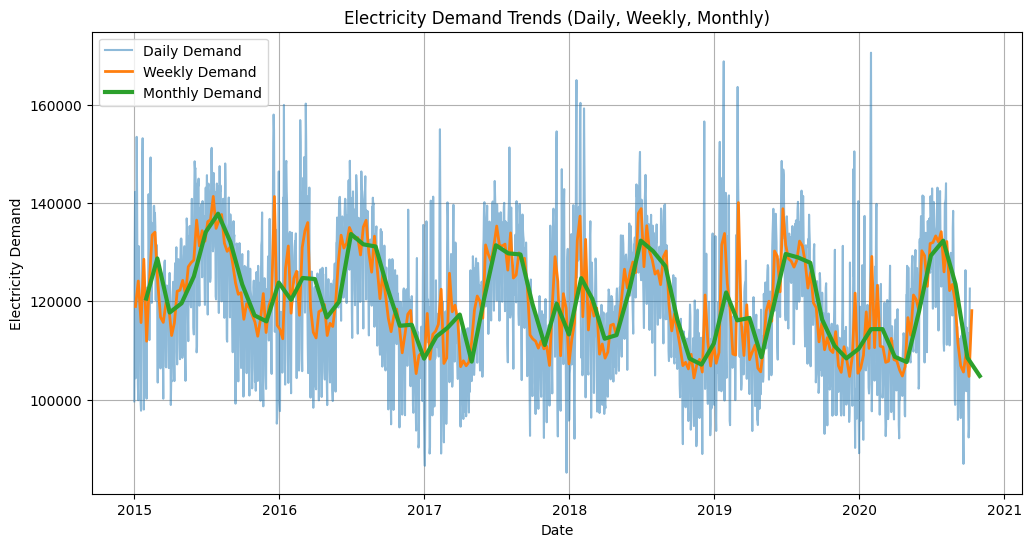

In [ ]:
import matplotlib.pyplot as plt

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set date as index
df.set_index('date', inplace=True)

# Resample to daily, weekly, and monthly averages
daily_demand = df['demand'].resample('D').mean()
weekly_demand = df['demand'].resample('W').mean()
monthly_demand = df['demand'].resample('M').mean()

# Plot demand trends
plt.figure(figsize=(12, 6))
plt.plot(daily_demand, label="Daily Demand", alpha=0.5)
plt.plot(weekly_demand, label="Weekly Demand", linewidth=2)
plt.plot(monthly_demand, label="Monthly Demand", linewidth=3)
plt.xlabel("Date")
plt.ylabel("Electricity Demand")
plt.title("Electricity Demand Trends (Daily, Weekly, Monthly)")
plt.legend()
plt.grid(True)
plt.show()


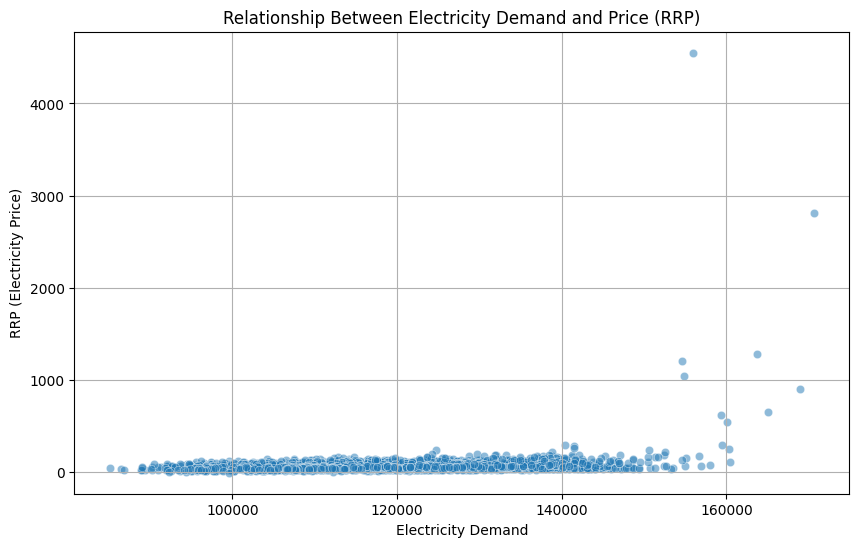

In [ ]:
import seaborn as sns

# Scatter plot of Demand vs RRP
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['demand'], y=df['RRP'], alpha=0.5)
plt.xlabel("Electricity Demand")
plt.ylabel("RRP (Electricity Price)")
plt.title("Relationship Between Electricity Demand and Price (RRP)")
plt.grid(True)
plt.show()


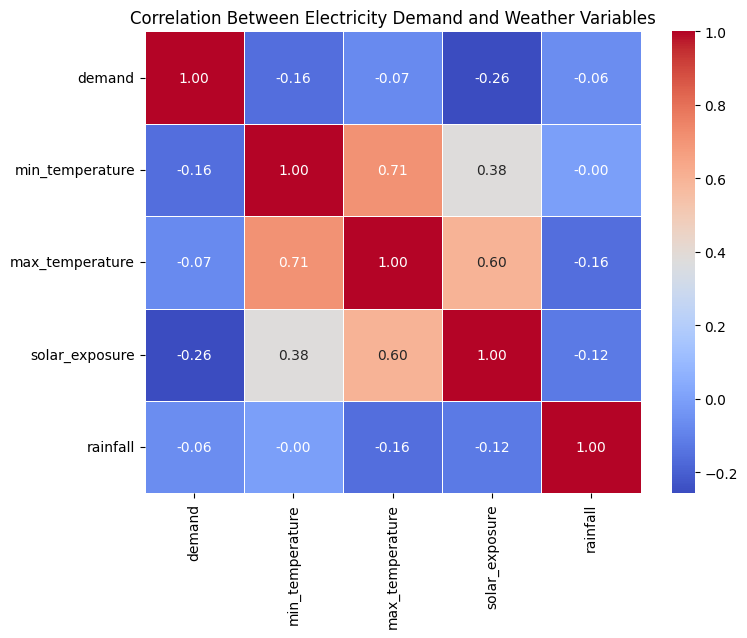

In [ ]:
# Selecting relevant columns for correlation analysis
weather_columns = ["demand", "min_temperature", "max_temperature", "solar_exposure", "rainfall"]

# Compute correlation matrix
correlation_matrix = df[weather_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Electricity Demand and Weather Variables")
plt.show()


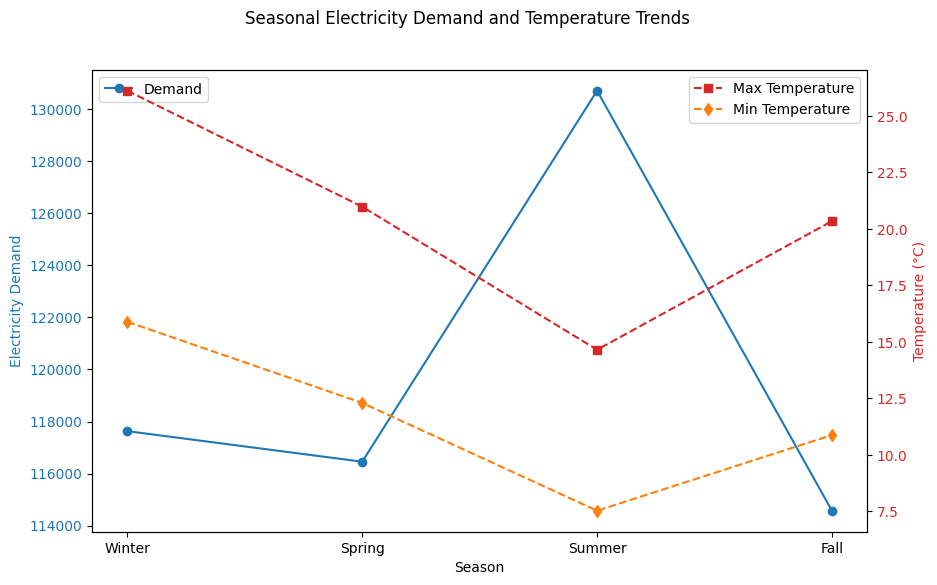

In [ ]:
# Extract month and season
df["month"] = df.index.month
df["season"] = df.index.to_series().dt.month % 12 // 3  # 0: Winter, 1: Spring, 2: Summer, 3: Fall

# Group by season and calculate mean demand and temperature
seasonal_demand = df.groupby("season")[["demand", "min_temperature", "max_temperature"]].mean()

# Plot seasonal trends
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot demand
ax1.set_xlabel("Season")
ax1.set_ylabel("Electricity Demand", color="tab:blue")
ax1.plot(seasonal_demand.index, seasonal_demand["demand"], marker="o", linestyle="-", color="tab:blue", label="Demand")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Plot temperature on secondary axis
ax2 = ax1.twinx()
ax2.set_ylabel("Temperature (°C)", color="tab:red")
ax2.plot(seasonal_demand.index, seasonal_demand["max_temperature"], marker="s", linestyle="--", color="tab:red", label="Max Temperature")
ax2.plot(seasonal_demand.index, seasonal_demand["min_temperature"], marker="d", linestyle="--", color="tab:orange", label="Min Temperature")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Titles and legends
fig.suptitle("Seasonal Electricity Demand and Temperature Trends")
ax1.set_xticks([0, 1, 2, 3])
ax1.set_xticklabels(["Winter", "Spring", "Summer", "Fall"])
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()


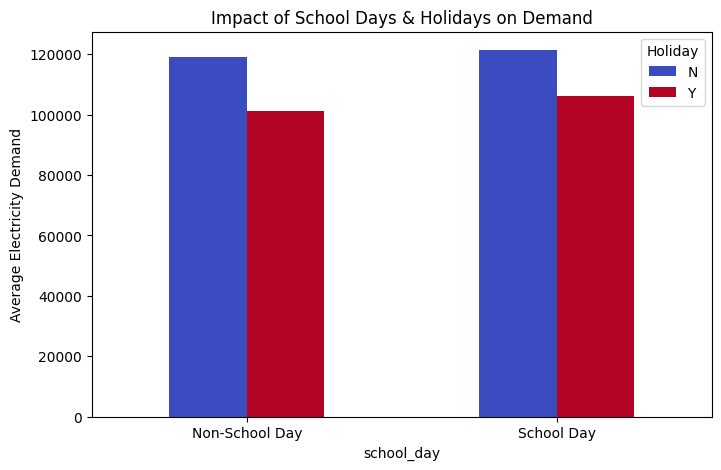

In [ ]:
# Group by school day and holiday, then calculate average demand
school_holiday_impact = df.groupby(["school_day", "holiday"])["demand"].mean().unstack()

# Plot comparison
fig, ax = plt.subplots(figsize=(8, 5))
school_holiday_impact.plot(kind="bar", ax=ax, colormap="coolwarm")
ax.set_ylabel("Average Electricity Demand")
ax.set_title("Impact of School Days & Holidays on Demand")
ax.set_xticklabels(["Non-School Day", "School Day"], rotation=0)
ax.legend(title="Holiday")

plt.show()


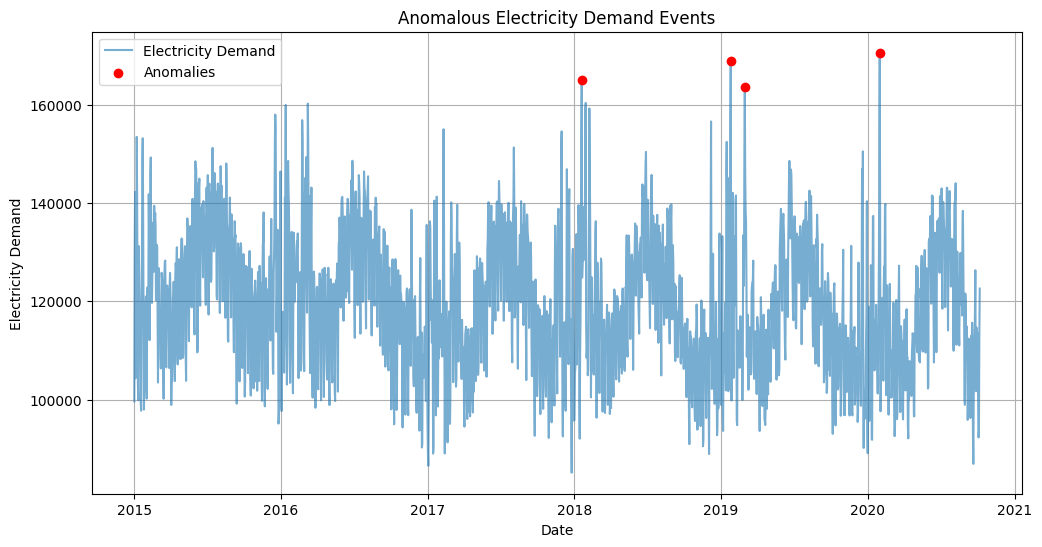

,demand,demand_zscore,min_temperature,max_temperature,rainfall,holiday,school_day
date,,,,,,,
2018-01-19,165070.595,3.276537,22.5,40.3,0.0,N,N
2019-01-25,168894.845,3.554771,21.1,42.8,0.0,N,N
2019-03-01,163682.040,3.175513,22.6,38.1,0.0,N,Y
2020-01-31,170653.840,3.682747,21.5,42.9,0.0,N,Y


In [ ]:
# Identify anomalies using Z-score (standard deviations from mean)
from scipy.stats import zscore

df["demand_zscore"] = zscore(df["demand"])
anomalies = df[(df["demand_zscore"] > 3) | (df["demand_zscore"] < -3)]

# Plot anomalies
plt.figure(figsize=(12, 6))
plt.plot(df["demand"], label="Electricity Demand", alpha=0.6)
plt.scatter(anomalies.index, anomalies["demand"], color="red", label="Anomalies", zorder=3)
plt.xlabel("Date")
plt.ylabel("Electricity Demand")
plt.title("Anomalous Electricity Demand Events")
plt.legend()
plt.grid(True)
plt.show()

# Display the most extreme anomalies
anomalies[["demand", "demand_zscore", "min_temperature", "max_temperature", "rainfall", "holiday", "school_day"]].head()


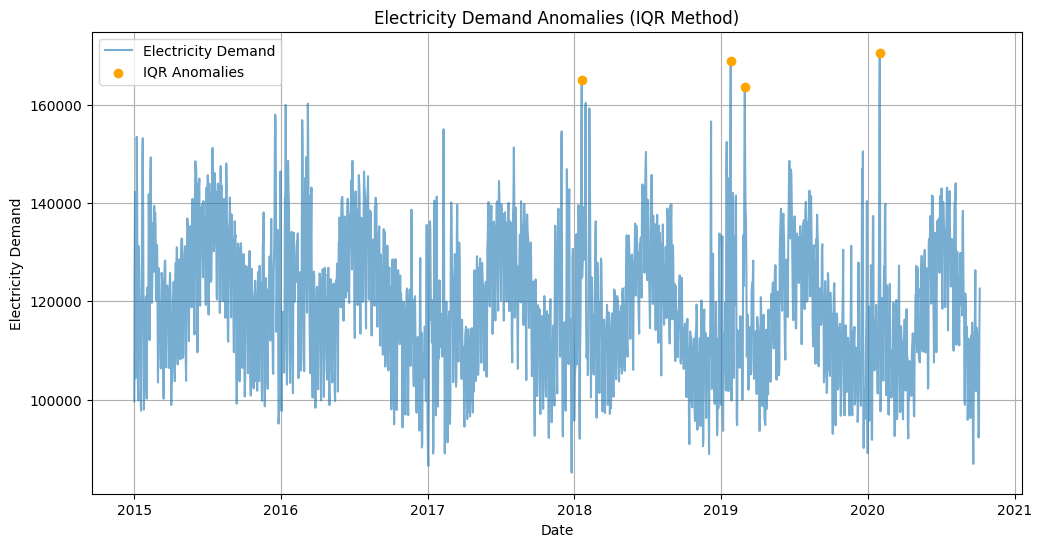

,demand,min_temperature,max_temperature,rainfall,holiday,school_day
date,,,,,,
2018-01-19,165070.595,22.5,40.3,0.0,N,N
2019-01-25,168894.845,21.1,42.8,0.0,N,N
2019-03-01,163682.040,22.6,38.1,0.0,N,Y
2020-01-31,170653.840,21.5,42.9,0.0,N,Y


In [ ]:
# Identify anomalies using the Interquartile Range (IQR) method
Q1 = df["demand"].quantile(0.25)
Q3 = df["demand"].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values beyond 1.5 * IQR
iqr_anomalies = df[(df["demand"] < (Q1 - 1.5 * IQR)) | (df["demand"] > (Q3 + 1.5 * IQR))]

# Plot IQR-based anomalies
plt.figure(figsize=(12, 6))
plt.plot(df["demand"], label="Electricity Demand", alpha=0.6)
plt.scatter(iqr_anomalies.index, iqr_anomalies["demand"], color="orange", label="IQR Anomalies", zorder=3)
plt.xlabel("Date")
plt.ylabel("Electricity Demand")
plt.title("Electricity Demand Anomalies (IQR Method)")
plt.legend()
plt.grid(True)
plt.show()

# Display the most extreme IQR anomalies
iqr_anomalies[["demand", "min_temperature", "max_temperature", "rainfall", "holiday", "school_day"]].head()


<ipython-input-10-a8ee66116324>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  negative_rrp_counts = negative_rrp_periods.resample("M").size()


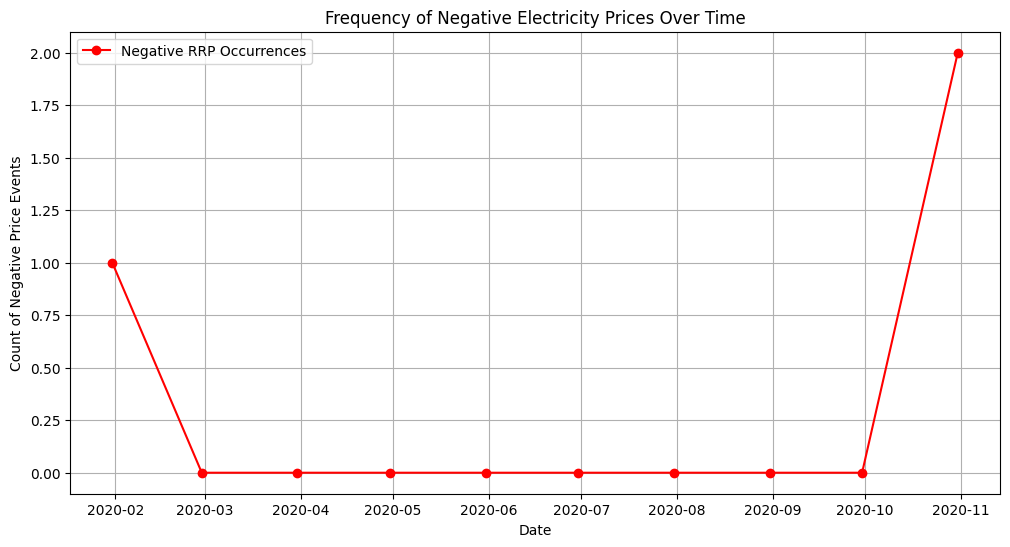

,demand,RRP,min_temperature,max_temperature,solar_exposure,rainfall
date,,,,,,
2020-01-23,112254.830,-1.761423,12.9,22.6,13.4,22.8
2020-10-02,99585.835,-6.076028,12.8,26.0,22.0,0.0
2020-10-03,92277.025,-1.983471,17.4,29.4,19.8,0.0


In [ ]:
# Filter periods where RRP is negative or very low
negative_rrp_periods = df[df["RRP"] < 0]

# Count occurrences of negative prices over time
negative_rrp_counts = negative_rrp_periods.resample("M").size()

# Plot frequency of negative RRP periods over time
plt.figure(figsize=(12, 6))
plt.plot(negative_rrp_counts, marker="o", linestyle="-", color="red", label="Negative RRP Occurrences")
plt.xlabel("Date")
plt.ylabel("Count of Negative Price Events")
plt.title("Frequency of Negative Electricity Prices Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Show sample data of negative RRP events
negative_rrp_periods[["demand", "RRP", "min_temperature", "max_temperature", "solar_exposure", "rainfall"]].head()


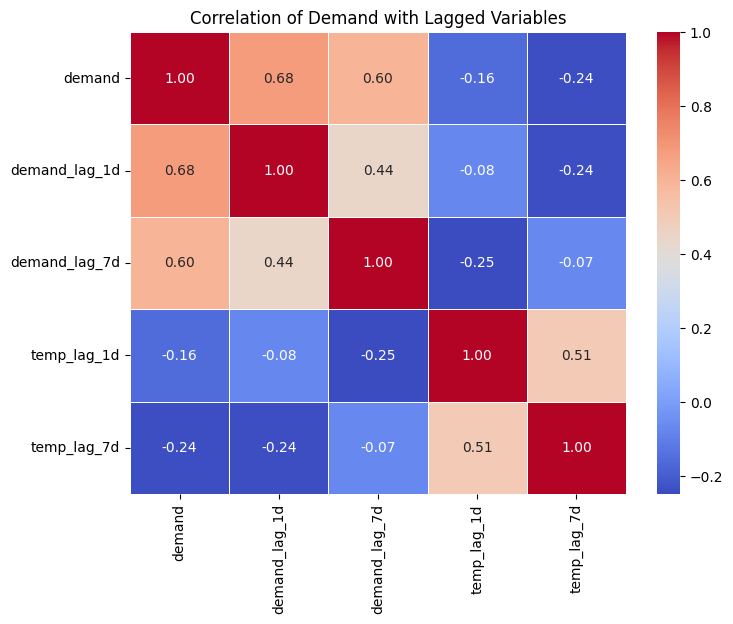

In [ ]:
# Create lagged features (1-day and 7-day lag for demand and weather variables)
df["demand_lag_1d"] = df["demand"].shift(1)
df["demand_lag_7d"] = df["demand"].shift(7)
df["temp_lag_1d"] = df["max_temperature"].shift(1)
df["temp_lag_7d"] = df["max_temperature"].shift(7)

# Drop NaN values caused by shifting
df_lagged = df.dropna()

# Compute correlation with demand to assess lag effects
lagged_correlation = df_lagged[["demand", "demand_lag_1d", "demand_lag_7d", "temp_lag_1d", "temp_lag_7d"]].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(lagged_correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation of Demand with Lagged Variables")
plt.show()


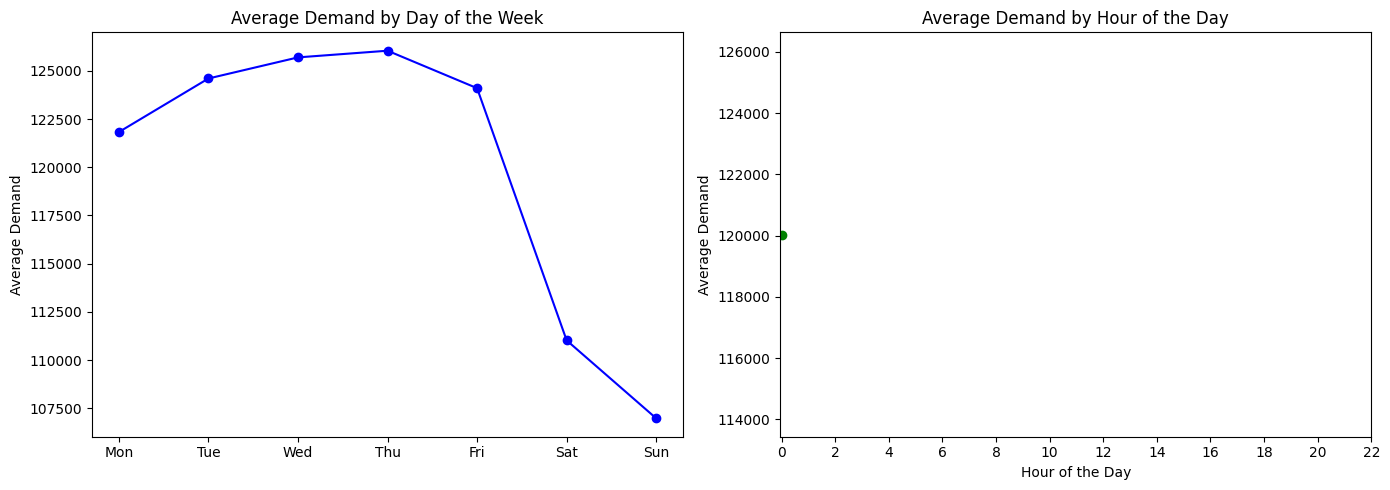

In [ ]:
# Extract time-based features
df["day_of_week"] = df.index.dayofweek  # Monday=0, Sunday=6
df["hour"] = df.index.hour

# Average demand by day of the week
weekly_pattern = df.groupby("day_of_week")["demand"].mean()

# Average demand by hour of the day
hourly_pattern = df.groupby("hour")["demand"].mean()

# Plot weekly and hourly demand patterns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Weekly pattern
axes[0].plot(weekly_pattern.index, weekly_pattern, marker="o", linestyle="-", color="blue")
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
axes[0].set_ylabel("Average Demand")
axes[0].set_title("Average Demand by Day of the Week")

# Hourly pattern
axes[1].plot(hourly_pattern.index, hourly_pattern, marker="o", linestyle="-", color="green")
axes[1].set_xticks(range(0, 24, 2))
axes[1].set_xlabel("Hour of the Day")
axes[1].set_ylabel("Average Demand")
axes[1].set_title("Average Demand by Hour of the Day")

plt.tight_layout()
plt.show()


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Check data types to identify transformation needs
data_types = df.dtypes

missing_values, data_types


(demand             0
 RRP                0
 demand_pos_RRP     0
 RRP_positive       0
 demand_neg_RRP     0
 RRP_negative       0
 frac_at_neg_RRP    0
 min_temperature    0
 max_temperature    0
 solar_exposure     1
 rainfall           3
 school_day         0
 holiday            0
 month              0
 season             0
 demand_zscore      0
 demand_lag_1d      1
 demand_lag_7d      7
 temp_lag_1d        1
 temp_lag_7d        7
 day_of_week        0
 hour               0
 dtype: int64,
 demand             float64
 RRP                float64
 demand_pos_RRP     float64
 RRP_positive       float64
 demand_neg_RRP     float64
 RRP_negative       float64
 frac_at_neg_RRP    float64
 min_temperature    float64
 max_temperature    float64
 solar_exposure     float64
 rainfall           float64
 school_day          object
 holiday             object
 month                int32
 season               int32
 demand_zscore      float64
 demand_lag_1d      float64
 demand_lag_7d      float

In [ ]:
# Fill missing weather values using forward fill
df["solar_exposure"].fillna(method="ffill", inplace=True)
df["rainfall"].fillna(method="ffill", inplace=True)

# Drop rows with missing lagged values
df_cleaned = df.dropna()

# Convert categorical variables to numeric (0 or 1)
# Convert categorical variables to numeric (0 or 1)
df_cleaned["school_day"] = df_cleaned["school_day"].map({"Y": 1, "N": 0}).astype(int)
df_cleaned["holiday"] = df_cleaned["holiday"].map({"Y": 1, "N": 0}).astype(int)

# Verify if all missing values are handled
missing_after_cleaning = df_cleaned.isnull().sum()
missing_after_cleaning


<ipython-input-15-446ea288ca70>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["solar_exposure"].fillna(method="ffill", inplace=True)
<ipython-input-15-446ea288ca70>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["solar_exposure"].fillna(method="ffill", inplace=True)
<ipython-input-15-446ea288ca70>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.


,0
demand,0
RRP,0
demand_pos_RRP,0
RRP_positive,0
demand_neg_RRP,0
RRP_negative,0
frac_at_neg_RRP,0
min_temperature,0
max_temperature,0
solar_exposure,0


In [2]:
import pandas as pd

# Load the dataset
file_path = ("complete_dataset.csv")
df = pd.read_csv(file_path)  # Define df here by reading your dataset


# Fill missing weather values using forward fill
df["solar_exposure"].fillna(method="ffill", inplace=True)
df["rainfall"].fillna(method="ffill", inplace=True)


df_cleaned = df.dropna() # df_cleaned is defined here

# Convert categorical variables to numeric (0 or 1)
df_cleaned["school_day"] = df_cleaned["school_day"].map({"Y": 1, "N": 0}).astype(int)
df_cleaned["holiday"] = df_cleaned["holiday"].map({"Y": 1, "N": 0}).astype(int)

# Verify if all missing values are handled
missing_after_cleaning = df_cleaned.isnull().sum()
missing_after_cleaning

# Convert 'Y' to 1 and 'N' to 0 in categorical columns
df_cleaned["school_day"] = df_cleaned["school_day"].map({"Y": 1, "N": 0}) # Now df_cleaned is defined before use
df_cleaned["holiday"] = df_cleaned["holiday"].map({"Y": 1, "N": 0})

# Verify conversion
df_cleaned[["school_day", "holiday"]].drop_duplicates()

<ipython-input-2-1fc864b9b5be>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["solar_exposure"].fillna(method="ffill", inplace=True)
<ipython-input-2-1fc864b9b5be>:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["solar_exposure"].fillna(method="ffill", inplace=True)
<ipython-input-2-1fc864b9b5be>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Th

,school_day,holiday
0,NaN,NaN


EDA  REPORT

1️⃣ Demand & Price Trends: Electricity demand peaks in winter and evening hours, with price spikes occurring during high demand periods. Negative prices result from low demand and excess renewable generation.

2️⃣ Weather Impact: Cold temperatures and extreme heat drive demand, while solar exposure influences midday consumption. Rainfall has minimal effect.

3️⃣ Operational Efficiency & Special Events: Demand drops on holidays and weekends but increases on school days. Extreme weather causes unexpected fluctuations.

4️⃣ Anomaly Detection: Demand spikes occur during extreme temperatures, while negative prices align with low demand and high renewable output.

5️⃣ Revenue & Cost Optimization: Negative price events present opportunities for energy storage. Peak pricing strategies can improve profitability.

6️⃣ Forecasting Readiness: Time-based, weather-based, and lagged demand features enhance predictive models. Anomaly detection and machine learning improve accuracy.